In [13]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, SimpleRNN # for creating regular densely-connected NN layers and RNN layers

# Data manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import math # to help with data reshaping of the data

# Sklearn
import sklearn # for model evaluation
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import mean_squared_error # for model evaluation metrics
from sklearn.preprocessing import MinMaxScaler # for feature scaling

# Visualization
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objects as go

In [8]:
# Read in the weather data csv
df=pd.read_csv('weatherAUS.csv', encoding='utf-8')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [10]:
# Drop records where target MinTemp=NaN or MaxTemp=NaN
df=df[pd.isnull(df['MinTemp'])==False]
df=df[pd.isnull(df['MaxTemp'])==False]

# Median daily temperature (mid point between Daily Max and Daily Min)
df['MedTemp']=df[['MinTemp', 'MaxTemp']].median(axis=1)

# Show a snaphsot of data
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MedTemp
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,18.15
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,16.25
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,19.30
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,18.60
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,24.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,12.65
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,13.10
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,14.45
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,16.15


Text(0.5, 1.0, 'Median Daily Temperatures in Canberra')

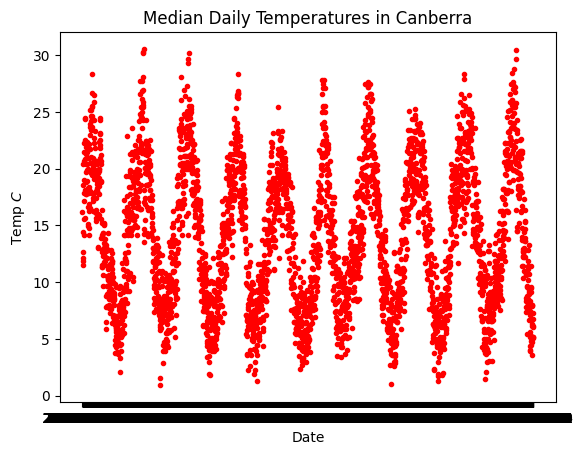

In [19]:
# Select only Canberra 
dfCan=df[df['Location']=='Canberra'].copy()
plt.plot(dfCan['Date'], dfCan['MedTemp'], '.r')
plt.xlabel('Date')
plt.ylabel('Temp $C$')
plt.title('Median Daily Temperatures in Canberra')

In [21]:
##### Step 0 - We will use this function in step 3 to get the data into the right shape
def prep_data(datain, time_step):
    # 1. y-array  
    # First, create an array with indices for y elements based on the chosen time_step
    y_indices = np.arange(start=time_step, stop=len(datain), step=time_step)
    # Create y array based on the above indices 
    y_tmp = datain[y_indices]
    
    # 2. X-array  
    # We want to have the same number of rows for X as we do for y
    rows_X = len(y_tmp)
    # Since the last element in y_tmp may not be the last element of the datain, 
    # let's ensure that X array stops with the last y
    X_tmp = datain[range(time_step*rows_X)]
    # Now take this array and reshape it into the desired shape
    X_tmp = np.reshape(X_tmp, (rows_X, time_step, 1))
    return X_tmp, y_tmp

In [43]:
##### Step 1 - Select data for modeling and apply MinMax scaling
X=dfCan[['MedTemp']]
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.51351351],
       [0.65878378],
       [0.59459459],
       ...,
       [0.14358108],
       [0.21283784],
       [0.1402027 ]])

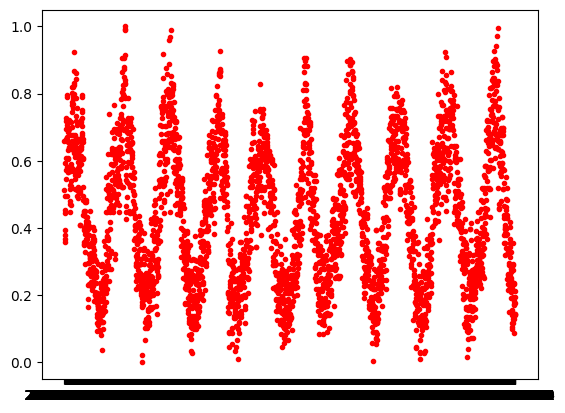

In [44]:
plt.plot(dfCan['Date'], X_scaled, '.r')


In [47]:
##### Step 2 - Create training and testing samples
train_data, test_data = train_test_split(X_scaled, test_size=0.2, shuffle=False)
len(train_data)

2742

In [51]:
##### Step 3 - Prepare input X and target y arrays using previously defined function
time_step = 7
X_train, y_train = prep_data(train_data, time_step)
X_test, y_test = prep_data(test_data, time_step)
X_train[0:3]

array([[[0.51351351],
        [0.65878378],
        [0.59459459],
        [0.45439189],
        [0.36824324],
        [0.35810811],
        [0.37837838]],

       [[0.39527027],
        [0.44594595],
        [0.49493243],
        [0.5472973 ],
        [0.57263514],
        [0.6097973 ],
        [0.69425676]],

       [[0.66554054],
        [0.71959459],
        [0.72804054],
        [0.6722973 ],
        [0.72297297],
        [0.79560811],
        [0.79054054]]])

In [52]:
##### Step 4 - Specify the structure of a Neural Network
model = Sequential(name="First-RNN-Model") # Model
model.add(Input(shape=(time_step,1), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(SimpleRNN(units=1, activation='tanh', name='Hidden-Recurrent-Layer')) # Hidden Recurrent Layer, Tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x)))
model.add(Dense(units=1, activation='tanh', name='Hidden-Layer')) # Hidden Layer, Tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x)))
model.add(Dense(units=1, activation='linear', name='Output-Layer')) # Output Layer, Linear(x) = x

In [53]:
##### Step 5 - Compile keras model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

In [54]:
##### Step 6 - Fit keras model on the dataset
model.fit(X_train, # input data
          y_train, # target data
          batch_size=1, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=20, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
          #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
         )

Epoch 1/20
391/391 [==============================] - 1s 789us/step - loss: 0.0701 - mean_squared_error: 0.0701 - mean_absolute_error: 0.2166
Epoch 2/20
391/391 [==============================] - 0s 721us/step - loss: 0.0273 - mean_squared_error: 0.0273 - mean_absolute_error: 0.1374
Epoch 3/20
391/391 [==============================] - 0s 734us/step - loss: 0.0111 - mean_squared_error: 0.0111 - mean_absolute_error: 0.0813
Epoch 4/20
391/391 [==============================] - 0s 738us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0726
Epoch 5/20
391/391 [==============================] - 0s 733us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0708
Epoch 6/20
391/391 [==============================] - 0s 720us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0701
Epoch 7/20
391/391 [==============================] - 0s 740us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0701
Epoch 

In [56]:
##### Step 6 - Fit keras model on the dataset
model.fit(X_train, # input data
          y_train, # target data
          batch_size=1, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=20, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
         )

Epoch 1/20
391/391 [==============================] - 0s 777us/step - loss: 0.0066 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0644
Epoch 2/20
391/391 [==============================] - 0s 732us/step - loss: 0.0066 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0649
Epoch 3/20
391/391 [==============================] - 0s 743us/step - loss: 0.0066 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0649
Epoch 4/20
391/391 [==============================] - 0s 728us/step - loss: 0.0065 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0648
Epoch 5/20
391/391 [==============================] - 0s 726us/step - loss: 0.0066 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0647
Epoch 6/20
391/391 [==============================] - 0s 731us/step - loss: 0.0065 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0637
Epoch 7/20
391/391 [==============================] - 0s 739us/step - loss: 0.0065 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0642
Epoch 

In [57]:
##### Step 7 - Use model to make predictions
# Predict the result on training data
pred_train = model.predict(X_train)
# Predict the result on test data
pred_test = model.predict(X_test)


##### Step 8 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
print("Note, the last parameter in each layer is bias while the rest are weights")
print("")
for layer in model.layers:
    print(layer.name)
    for item in layer.get_weights():
        print("  ", item)
print("")
print('---------- Evaluation on Training Data ----------')
print("MSE: ", mean_squared_error(y_train, pred_train))
print("")

print('---------- Evaluation on Test Data ----------')
print("MSE: ", mean_squared_error(y_test, pred_test))
print("")

4/4 [==============================] - 0s 1ms/step

-------------------- Model Summary --------------------
Model: "First-RNN-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Recurrent-Layer (Sim  (None, 1)                3         
 pleRNN)                                                         
                                                                 
 Hidden-Layer (Dense)        (None, 1)                 2         
                                                                 
 Output-Layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Note, the last parameter in each layer is bias while the rest are weights

Hidden-Rec

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.array(range(0,len(y_test))),
                         y=scaler.inverse_transform(y_test).flatten(),
                         mode='lines',
                         name='Median Temperature - Actual (Test)',
                         opacity=0.8,
                         line=dict(color='black', width=1)
                        ))
fig.add_trace(go.Scatter(x=np.array(range(0,len(pred_test))),
                         y=scaler.inverse_transform(pred_test).flatten(),
                         mode='lines',
                         name='Median Temperature - Predicted (Test)',
                         opacity=0.8,
                         line=dict(color='red', width=1)
                        ))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Observation'
                )

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Degrees Celsius'
                )

# Set figure title
fig.update_layout(title=dict(text="Median Daily Temperatures in Canberra", 
                             font=dict(color='black')),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                 )

fig.show()

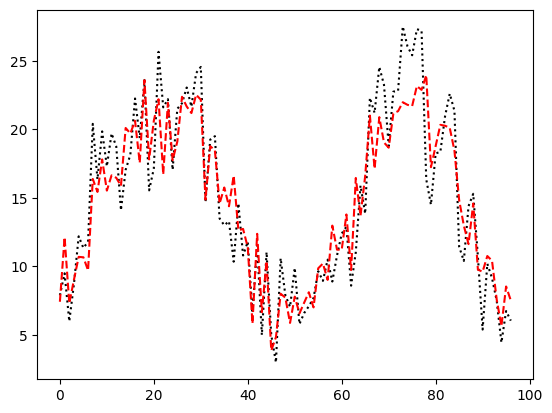

In [58]:
time=range(0,len(y_test))
plt.plot(scaler.inverse_transform(y_test),':k')
plt.plot(scaler.inverse_transform(pred_test),'--r')